<a href="https://colab.research.google.com/github/anandha2017/simple-github-test/blob/master/TrialBalanceMontecarloSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
num_accounts = 30000
num_simulations = 10000
num_days = 30
annual_interest_rate = 0.05
daily_interest_rate = annual_interest_rate / 365
verbosity_level = 0  # Adjust as needed for debugging; 0, 1 or 2

In [ ]:
def monte_carlo_simulation(num_accounts, num_simulations, num_days, daily_interest_rate, verbosity=0):
    differences = []
    for sim in range(num_simulations):
        if verbosity > 0:
            print(f"\nStarting Simulation {sim + 1}/{num_simulations}")

        # Generate random balances
        balances = np.random.uniform(1000, 5000, size=(num_accounts, num_days))
        if verbosity > 1:
            print(f"Balances for Simulation {sim + 1}:")
            print(balances)

        # Calculate daily accruals to 10 decimal places
        daily_accruals = np.round(balances * daily_interest_rate, 10)
        if verbosity > 1:
            print(f"Daily Accruals for Simulation {sim + 1}:")
            print(daily_accruals)

        # Method 1: Sum daily accruals per account, then round to 2 decimal places
        method1_interest = np.round(np.sum(daily_accruals, axis=1), 2)
        if verbosity > 1:
            print(f"Method 1 Interest for Simulation {sim + 1}:")
            print(method1_interest)

        # Method 2: Round daily accruals to 2 decimal places per day, then sum per account
        method2_interest = np.sum(np.round(daily_accruals, 2), axis=1)
        if verbosity > 1:
            print(f"Method 2 Interest for Simulation {sim + 1}:")
            print(method2_interest)

        # Sum all interest from Method 1
        total_interest_method1 = np.sum(method1_interest)

        # Sum all interest from Method 2
        total_interest_method2 = np.sum(method2_interest)

        if verbosity > 0:
            print(f"Total Interest Method 1 for Simulation {sim + 1}: {total_interest_method1}")
            print(f"Total Interest Method 2 for Simulation {sim + 1}: {total_interest_method2}")

        # Calculate the difference between the total interests
        difference = total_interest_method1 - total_interest_method2
        if verbosity > 0:
            print(f"Difference between methods for Simulation {sim + 1}: {difference}")

        # Append the difference to the list
        differences.append(difference)

        # Optional: Print progress every 100 simulations if verbosity is 0
        if verbosity == 0 and (sim + 1) % 100 == 0:
            print(f"Simulation {sim + 1}/{num_simulations} completed")

    return differences

In [ ]:
# Run the simulation
differences = monte_carlo_simulation(num_accounts, num_simulations, num_days, daily_interest_rate, verbosity=verbosity_level)



Simulation 100/10000 completed
Simulation 200/10000 completed
Simulation 300/10000 completed
Simulation 400/10000 completed
Simulation 500/10000 completed
Simulation 600/10000 completed
Simulation 700/10000 completed
Simulation 800/10000 completed
Simulation 900/10000 completed
Simulation 1000/10000 completed
Simulation 1100/10000 completed
Simulation 1200/10000 completed
Simulation 1300/10000 completed
Simulation 1400/10000 completed
Simulation 1500/10000 completed
Simulation 1600/10000 completed
Simulation 1700/10000 completed
Simulation 1800/10000 completed
Simulation 1900/10000 completed
Simulation 2000/10000 completed
Simulation 2100/10000 completed
Simulation 2200/10000 completed
Simulation 2300/10000 completed
Simulation 2400/10000 completed
Simulation 2500/10000 completed
Simulation 2600/10000 completed
Simulation 2700/10000 completed
Simulation 2800/10000 completed
Simulation 2900/10000 completed
Simulation 3000/10000 completed
Simulation 3100/10000 completed
Simulation 3200/1

In [ ]:
# Convert to NumPy array
differences = np.array(differences)


Simulation Results:
Average Total Difference: £12.53
Maximum Total Difference: £23.18
Minimum Total Difference: £2.22
Standard Deviation: £2.78


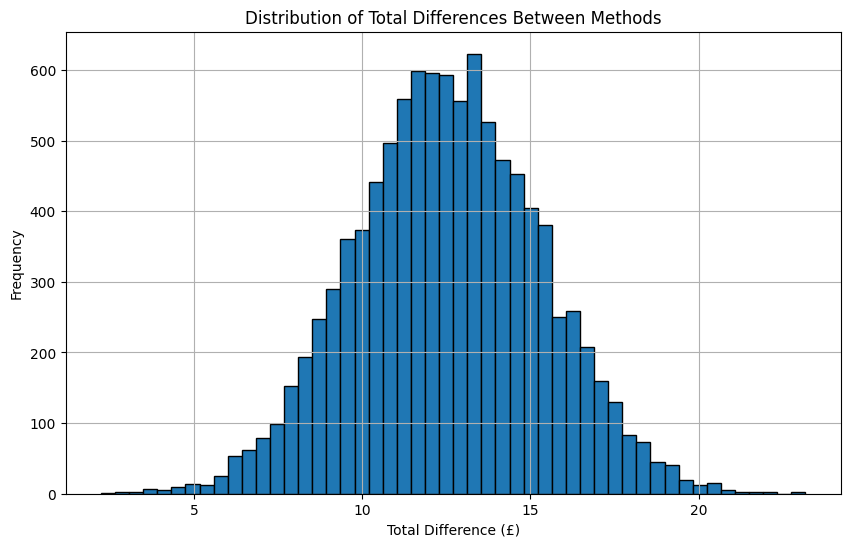

In [ ]:
# Analysis
average_difference = np.mean(differences)
max_difference = np.max(differences)
min_difference = np.min(differences)
std_dev_difference = np.std(differences)

print("\nSimulation Results:")
print(f"Average Total Difference: £{average_difference:.2f}")
print(f"Maximum Total Difference: £{max_difference:.2f}")
print(f"Minimum Total Difference: £{min_difference:.2f}")
print(f"Standard Deviation: £{std_dev_difference:.2f}")

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=50, edgecolor='k')
plt.title('Distribution of Total Differences Between Methods')
plt.xlabel('Total Difference (£)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()